Μάθημα: **Μηχανική Μάθηση** - Χειμερινό Εξάμηνο 2022-2023

1η Σειρά Αναλυτικών Ασκήσεων - Άσκηση 1.1 - Ονοματεπώνυμο: Ειρήνη Δόντη - Α.Μ: 03119839

In [ ]:
import pandas as pd
import scipy as sc
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

df1=pd.read_csv("olympic_teams.csv") 

In [ ]:
# x1 sum of athletes, x2 sum of events, y sum of win medals
from sklearn import preprocessing
import numpy as np
x1_array = np.array(df1['athletes'])
x2_array = np.array(df1['events'])
y_array = np.array(df1['medals'])

x1_array = (x1_array - np.mean(x1_array))/(np.std(x1_array))
x2_array = (x2_array - np.mean(x2_array))/(np.std(x2_array))
y_array = (y_array - np.mean(y_array))/(np.std(y_array))


[0.25086634 0.56527808 0.79743832 ... 0.79916355 0.52113962 0.20127291]


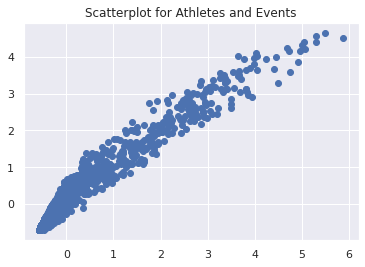

In [ ]:
#a
from numpy import mean
from numpy import std
from numpy.random import randn
from numpy.random import seed
from matplotlib import pyplot
c = np.correlate(x1_array,x2_array, 'full')
print(c)
pyplot.scatter(x1_array, x2_array)
pyplot.title("Scatterplot for Athletes and Events")
pyplot.show()

In [ ]:
#b
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from scipy import stats

combinedx12 = np.vstack((x1_array, x2_array)).T
x =np.array(combinedx12)
y = y_array

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25,  random_state=0)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred_train0 = model.predict(X_train)
y_pred_test0 = model.predict(X_test)
print("y = w0 + w1x1 + w2x2\n")
w12 = model.coef_
print("[w1, w2] = ",w12, "\n")

w0 = model.intercept_
print("w0 = ", w0)

y = w0 + w1x1 + w2x2

[w1, w2] =  [ 1.91265305 -1.09767984] 

w0 =  0.00017668439365478962


In [ ]:
#c
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error,r2_score
from sklearn import model_selection

lambda_values = [1,10,100] # l = 1,10,100
ridge_model = Ridge()
coefficients = []
intercepts = []
y_pred_train = []
y_pred_test = []

print("y = w0 + w1x1 + w2x2\n")
for i in lambda_values:
    ridge_model.set_params(alpha = i)
    ridge_model.fit(X_train, y_train)
    coefficients.append(ridge_model.coef_)
    y_pred_train.append(ridge_model.predict(X_train))
    y_pred_test.append(ridge_model.predict(X_test))
    print("for lambda=", i, ": [w1, w2] = ", ridge_model.coef_)
    intercepts.append(ridge_model.intercept_)
    print("w0 = ", ridge_model.intercept_,"\n")


y = w0 + w1x1 + w2x2

for lambda= 1 : [w1, w2] =  [ 1.87292946 -1.05814017]
w0 =  0.00015810884992075456 

for lambda= 10 : [w1, w2] =  [ 1.59128006 -0.77830457]
w0 =  2.8340119101693748e-05 

for lambda= 100 : [w1, w2] =  [ 0.80213817 -0.0109802 ]
w0 =  -0.00027168969031920575 



In [ ]:
#d
print("RMSE for Train set")
#l = 0
RMSE = np.sqrt(mean_squared_error(y_train, y_pred_train0))
print("l = 0:",RMSE,"\n")
# l = 1
RMSE = np.sqrt(mean_squared_error(y_train, y_pred_train[0]))
print("l = 1:",RMSE,"\n")
# l = 10
RMSE = np.sqrt(mean_squared_error(y_train, y_pred_train[1]))
print("l = 10:",RMSE,"\n")
# l = 100
RMSE = np.sqrt(mean_squared_error(y_train, y_pred_train[2]))
print("l = 100:",RMSE,"\n")

print("RMSE for Test set")
#l = 0
RMSE = np.sqrt(mean_squared_error(y_test, y_pred_test0))
print("l = 0:",RMSE,"\n")
# l = 1
RMSE = np.sqrt(mean_squared_error(y_test, y_pred_test[0]))
print("l = 1:",RMSE,"\n")
# l = 10
RMSE = np.sqrt(mean_squared_error(y_test, y_pred_test[1]))
print("l = 10:",RMSE,"\n")
# l = 100
RMSE = np.sqrt(mean_squared_error(y_test, y_pred_test[2]))
print("l = 100:",RMSE,"\n")

RMSE for Train set
l = 0: 0.4965023519466231 

l = 1: 0.4965798669939448 

l = 10: 0.5015450834526199 

l = 100: 0.5534412988534566 

RMSE for Test set
l = 0: 0.4760136237516071 

l = 1: 0.47565112079642224 

l = 10: 0.4769140256764647 

l = 100: 0.5142340351600714 

